In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from xgcm import Grid

In [2]:
run = 'nw2_0.03125deg_N15_baseline_hmix20'
basepath = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/'
st = xr.open_dataset('%s/%s/static.nc' % (basepath,run), decode_times=False)


workpath = '/glade/u/home/chiungyin/NW2_Nora_data'
filter_fac = 32
ds_bleck = xr.open_dataset('%s/bleck_cycle_fac%i_500days.nc' % (workpath, filter_fac), decode_times=False)

In [3]:
coords = {'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'}
         }

grid = Grid(st, coords=coords, periodic=['X'])

st['dxT'] = grid.interp(st.dxCu,'X')
st['dyT'] = grid.interp(st.dyCv,'Y')

In [4]:
ds_bleck.info()

xarray.Dataset {
dimensions:
	xh = 1920 ;
	yh = 4480 ;
	zl = 15 ;

variables:
	float64 BC_conversion_TWA(yh, xh) ;
		BC_conversion_TWA:long_name = baroclinic conversion (TWA) ;
		BC_conversion_TWA:units = m3 s-3 ;
	float64 BC_conversion_TWA_alt(yh, xh) ;
		BC_conversion_TWA_alt:long_name = baroclinic conversion (TWA), alternative computation ;
		BC_conversion_TWA_alt:units = m3 s-3 ;
	float64 EKE_TWA(yh, xh) ;
		EKE_TWA:long_name = Eddy Kinetic Energy (TWA) ;
		EKE_TWA:units = m3 s-2 ;
	float64 EKE_bottom_drag_TWA(yh, xh) ;
		EKE_bottom_drag_TWA:long_name = Bottom drag work on EKE reservoir (TWA) ;
		EKE_bottom_drag_TWA:units = m3 s-3 ;
	float64 EKE_horizontal_viscosity_TWA(yh, xh) ;
		EKE_horizontal_viscosity_TWA:long_name = Horizontal friction on EKE reservoir (TWA) ;
		EKE_horizontal_viscosity_TWA:units = m3 s-3 ;
	float64 EKE_production_TWA(yh, xh) ;
		EKE_production_TWA:long_name = EKE production (TWA) ;
		EKE_production_TWA:units = m3 s-3 ;
	float64 EKE_transport_TWA(yh, xh) ;
		

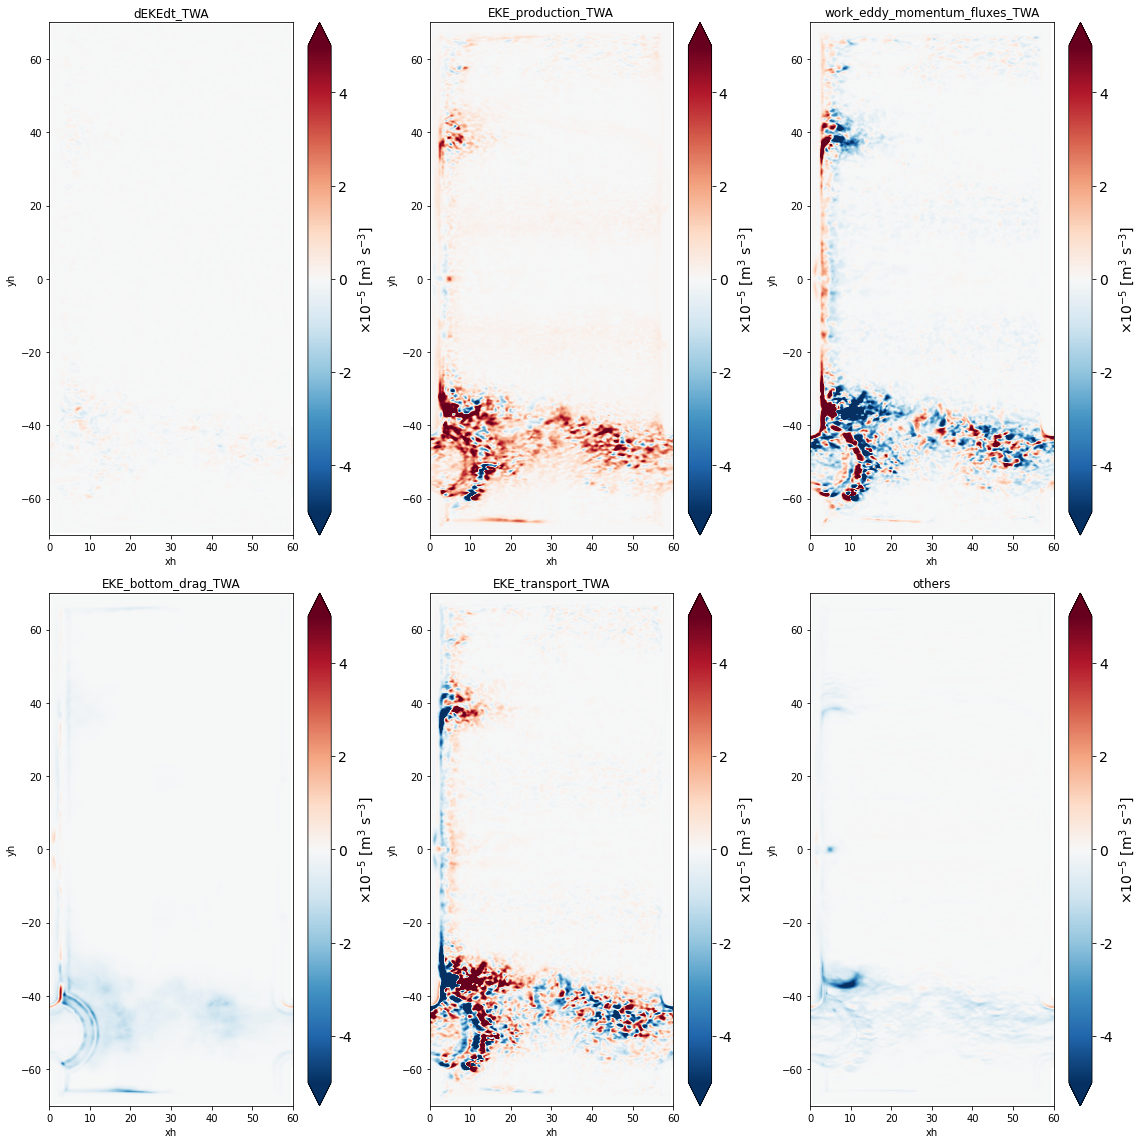

In [5]:

#dEKEdt_TWA is the EKE tendency
#EKE_production_TWA corresponds to GM source term
#work_eddy_momentum_fluxes_TWA  corresponds to Smag + backscatter
#EKE_wind_stress_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
#EKE_bottom_drag_TWA corresponds to MEKE bottom drag dissipation
#EKE_vertical_viscosity_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
#EKE_horizontal_viscosity_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
#EKE_transport_TWA is the EKE transport

extent = [0, 60, -70, 70]
vmax = 0.00005
vmin = -vmax

fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(2,3,1)
fld = 'dEKEdt_TWA'
p=ds_bleck[fld].where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

ax = fig.add_subplot(2,3,2)
fld = 'EKE_production_TWA'
p=ds_bleck[fld].where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

ax = fig.add_subplot(2,3,3)
fld = 'work_eddy_momentum_fluxes_TWA'
p=ds_bleck[fld].where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

ax = fig.add_subplot(2,3,4)
fld = 'EKE_bottom_drag_TWA'
p=ds_bleck[fld].where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

ax = fig.add_subplot(2,3,5)
fld = 'EKE_transport_TWA'
p=(-ds_bleck[fld]).where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

ax = fig.add_subplot(2,3,6)
fld = 'others' 
var=ds_bleck['EKE_vertical_viscosity_TWA']+ds_bleck['EKE_horizontal_viscosity_TWA']+ds_bleck['EKE_wind_stress_TWA']
p=var.where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

plt.tight_layout()
plt.show()

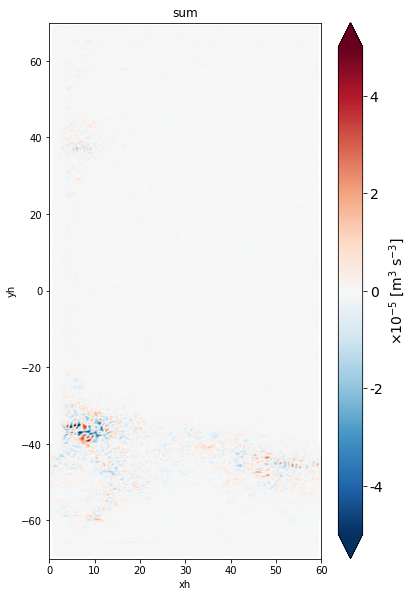

In [6]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(2,3,1)
fld = 'sum' 
var=(ds_bleck['EKE_vertical_viscosity_TWA']+ds_bleck['EKE_horizontal_viscosity_TWA']+ds_bleck['EKE_wind_stress_TWA']
    +ds_bleck['EKE_production_TWA']+ds_bleck['work_eddy_momentum_fluxes_TWA']+ds_bleck['EKE_bottom_drag_TWA']
    -ds_bleck['EKE_transport_TWA']+ds_bleck['dEKEdt_TWA'])
p=var.where(st.wet).plot(ax=ax, 
    vmax=vmax, vmin=-vmax, cmap='RdBu_r',
    add_colorbar=False)
ax.set(title = fld)
cb = fig.colorbar(p, extend='both', ticks=1e-5*np.arange(-4,5,2))
cb.ax.tick_params(labelsize=14)
cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)#, y=0.45)
cb.ax.set_yticklabels(['-4','-2','0','2','4'])

plt.tight_layout()
plt.show()

In [7]:
# Comparison between diagnostics from the truth case vs. parameterized MEKE budget:

# diagnostics from the truth case: 
# dEKEdt_TWA is the EKE tendency
# EKE_production_TWA corresponds to GM source term
# work_eddy_momentum_fluxes_TWA  corresponds to Smag + backscatter
# EKE_wind_stress_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
# EKE_bottom_drag_TWA corresponds to MEKE bottom drag dissipation
# EKE_vertical_viscosity_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
# EKE_horizontal_viscosity_TWA should be small and does not have a MEKE equivalent (but necessary to close the budget)
# EKE_transport_TWA is the EKE transport

# parameterized MEKE budget
# MEKE_src_GM is the GM source term
# MEKE_src_mom_lp is the source term from Laplacian viscosity, i.e., backscatter
# MEKE_src_mom_bh is the source term from biharmonic viscosity, i.e., Smag
# MEKE_src_btm_drag is the bottom drag dissipation
# MEKE_src_mom_K4 is the horizontal_viscosity of MEKE, which is currently turned off
# MEKE_src_adv is the horizontal transport of MEKE

# comparison should be made between:
# dEKEdt_TWA vs. sum of MEKE_src_*
# EKE_production_TWA vs. MEKE_src_GM
# work_eddy_momentum_fluxes_TWA vs. MEKE_src_mom_lp+MEKE_src_mom_bh
# EKE_bottom_drag_TWA vs. MEKE_src_btm_drag
# minus of EKE_transport_TWA vs. MEKE_src_adv
